### Stimulus encoding using MI estimator for the dFC time-series

In [1]:
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/GrayData-Analysis")
import os

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from frites import set_mpl_style

set_mpl_style()


Bad key legend.labelcolor in file /home/vinicius/anaconda3/envs/gda/lib/python3.8/site-packages/frites/data/frites.mplstyle, line 43 ('legend.labelcolor: 444444')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Create directory to save figures
if not os.path.exists("img/n6.2"):
    os.makedirs("img/n6.2")

In [3]:
# Extract area names
def _extract_roi(roi, sep):
    # Code by Etiene
    x_s, x_t = [], []
    for r in roi:
        _x_s, _x_t = r.split(sep)
        x_s.append(_x_s), x_t.append(_x_t)
    return np.array(x_s), np.array(x_t)

#### Load the coherence MI analysis data

In [4]:
metrics = np.array(["coh", "plv", "pec"])

In [5]:
root = os.path.expanduser("~/funcog/gda/Results/lucy/mutual_information")


def t_name(metric, stats):
    """Get the name of the file with the t-values"""
    return f"t_{metric}_avg_1_thr_1_{stats}.nc"


def p_name(metric, stats):
    """Get the name of the file with the p-values"""
    return f"pval_{metric}_avg_1_thr_1_{stats}.nc"

In [6]:
# Threshold for significance
pthr = 0.01

In [72]:
p_coh = xr.load_dataarray(os.path.join(root, p_name("coh", "fdr"))) <= pthr
t_val = xr.load_dataarray(os.path.join(root, t_name("coh", "fdr"))) * p_coh

In [76]:
plt.figure(figsize=(12, 6))
n_edges = np.zeros((3, 10, 5))
for i, metric in enumerate(["coh", "plv", "pec"]):
    p = xr.load_dataarray(os.path.join(root, p_name(metric, "fdr"))) <= pthr
    t_val = xr.load_dataarray(os.path.join(root, t_name(metric, "fdr"))) * p
    for f in range(10):
        for t in range(5):
            n_edges[i, f, t] = t_val.isel(freqs=f, times=t).mean()

<Figure size 864x432 with 0 Axes>

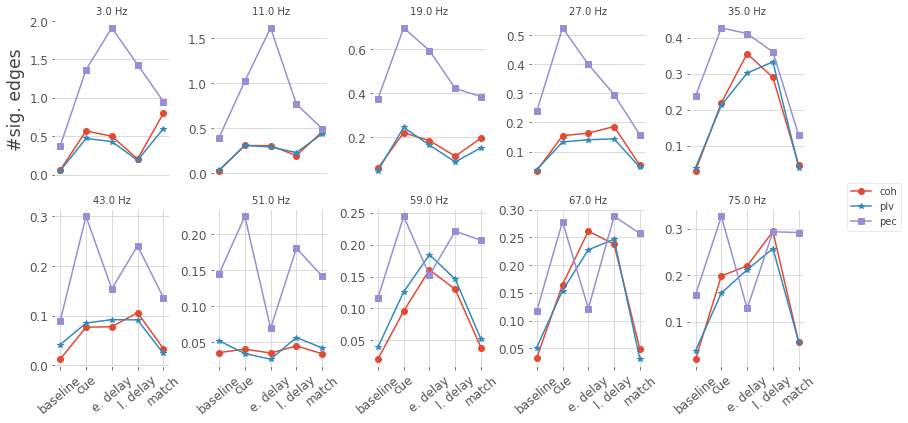

In [77]:
plt.figure(figsize=(13, 6))
for f in range(10):
    ax = plt.subplot(2, 5, f + 1)
    plt.plot(n_edges[0, f, :].T, "-o", label="coh")
    plt.plot(n_edges[1, f, :].T, "-*", label="plv")
    plt.plot(n_edges[2, f, :].T, "-s", label="pec")
    if f == 0:
        ax.legend(bbox_to_anchor=(7.5, 0), fontsize=10)
        ax.set_ylabel("#sig. edges")
    if f < 5:
        plt.xticks([])
    else:
        plt.xticks(
            [0, 1, 2, 3, 4],
            ["baseline", "cue", "e. delay", "l. delay", "match"],
            rotation=40,
        )
    plt.title(f"{p.freqs.values[f]} Hz", fontsize=10)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.2)

In [58]:
p_coh

<AxesSubplot:title={'center':'3.0 Hz'}>

In [41]:
_extract_roi(rois[0], "-")

(array(['a8B', 'a7B', 'a8L', 'a7B', 'F2', 'F1', 'a3', 'AIP', 'TPt', 'TPt',
        'TPt', 'MT', 'a7B', 'LIP', 'F1', 'a46V', 'a5', 'Core', 'Core',
        'a8L', 'a7op', 'Claustrum', 'a13', 'F1', 'OPRO', 'a46V', 'AIP'],
       dtype='<U9'),
 array(['AIP', 'F7', 'F2', 'F2', 'V1', 'MT', 'a7A', 'TPt', 'V4t', 'V2',
        'V1', 'V1', 'LIP', 'V1', 'MST', 'V2', 'Core', 'DP', 'V2', 'Ins',
        'V1', 'F1', 'a44', 'OPRO', 'Thal', 'V3', 'V3'], dtype='<U4'))

In [42]:
rois

[array(['a8B-AIP', 'a7B-F7', 'a8L-F2', 'a7B-F2', 'F2-V1', 'F1-MT',
        'a3-a7A', 'AIP-TPt', 'TPt-V4t', 'TPt-V2', 'TPt-V1', 'MT-V1',
        'a7B-LIP', 'LIP-V1', 'F1-MST', 'a46V-V2', 'a5-Core', 'Core-DP',
        'Core-V2', 'a8L-Ins', 'a7op-V1', 'Claustrum-F1', 'a13-a44',
        'F1-OPRO', 'OPRO-Thal', 'a46V-V3', 'AIP-V3'], dtype=object),
 array(['a46D-a8L', 'a46D-F2', 'a44-a46D', 'a46D-a7B', 'a46D-V6A',
        'a46D-V1', 'a8B-a9/46D', 'a8B-a8L', 'a8B-F2', 'a8B-AIP',
        'a8L-a9/46D', 'a9/46D-F2', 'a9/46D-F1', 'a8M-a8r', 'a8L-a8M',
        'a8M-AIP', 'a8L-F7', 'F2-F7', 'F7-V1', 'a8L-a8r', 'a8L-F2',
        'a44-a8L', 'a8L-a8L', 'a8L-AIP', 'a8L-MT', 'a8L-PIP', 'a8L-V2',
        'a8L-V1', 'a44-F2', 'F2-V2', 'F2-V1', 'a44-AIP', 'a44-V6A',
        'a44-V2', 'a44-V1', 'F1-TPt', 'a2-a5', 'a7B-AIP', 'a7B-TPt',
        'a7B-DP', 'a7B-V2', 'AIP-V1', 'a5-MT', 'a5-V2', 'TPt-V1',
        'a7A-PIP', 'a7A-V1', 'V2-V4t', 'V1-V4t', 'DP-PIP', 'DP-V2',
        'DP-V1', 'MT-V2', 'MT-V1', 'V2-V6A

In [80]:
p_pec = xr.load_dataarray(os.path.join(root, p_name("pec", "fdr"))) <= pthr

<xarray.DataArray 'pvalues' (freqs: 10, times: 5, roi: 987)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False,  True,  True],
        [ True, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False]],

       [[False, False,  True, ..., False,  True, False],
        [False, False, False, ...,  True, False, False],
        [ True, False, False, ..., False,  True, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       ...,

       [[False, False,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False,  True, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * freqs    (freqs) float64 3.0 11.0 19.0 27.0 35.0 43.0 51.0 59.0 67.0 75.0
  * times    (times) int64 0 1 2 3 4
  * roi      (roi) object 'a46D-a8B' 'a46D-F6' ... 'V2-V3A' 'V1-V3A'